In [2]:
import numpy as np 
import pandas as pd 

In [2]:
data = pd.read_csv('/kaggle/input/employee-attrition-data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print(data.shape)

(1470, 35)


In [5]:
#Summarising the data
data.info(verbose = False)
print()
data.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 35 entries, Age to YearsWithCurrManager
dtypes: int64(26), object(9)
memory usage: 402.1+ KB



<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [6]:
#Data visualisation libraries
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)

In [7]:
#Finfing data types of columns
column_data_types = data.dtypes

#finding numerical and categorical variables
numerical_var_count = 0
category_var_count = 0

for columna_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_var_count += 1
    else:
        category_var_count += 1
        
print(f"numerical variables => {numerical_var_count}")
print(f"categorical variables => {category_var_count}")

numerical variables => 26
categorical variables => 9


In [8]:
#Printing only umerical data entries random sample
data.select_dtypes(np.number).sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
229,29,896,18,1,1,315,3,86,2,1,4,2389,14961,1,13,3,3,80,0,4,3,2,4,3,0,1
914,55,177,8,1,1,1278,4,37,2,4,2,13577,25592,1,15,3,4,80,1,34,3,3,33,9,15,0
217,29,992,1,3,1,300,3,85,3,1,3,2058,19757,0,14,3,4,80,0,7,1,2,6,2,1,5
1382,31,976,3,2,1,1948,3,48,3,1,1,3065,3995,1,13,3,4,80,1,4,3,4,4,2,2,3
722,38,1391,10,1,1,1006,3,66,3,1,3,2684,12127,0,17,3,2,80,1,3,0,2,2,1,0,2


In [9]:
#printing only catrgorical data entries random sample
data.select_dtypes(include = 'O').sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
610,No,Travel_Rarely,Research & Development,Technical Degree,Male,Research Director,Divorced,Y,Yes
317,Yes,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Married,Y,No
774,No,Non-Travel,Research & Development,Medical,Male,Manager,Single,Y,No
117,No,Travel_Frequently,Sales,Technical Degree,Female,Sales Executive,Married,Y,No
1116,No,Travel_Rarely,Sales,Marketing,Male,Manager,Married,Y,No


dtype('O') A type 'O' just stands for “object” which in Pandas' world is a string (characters).

In [10]:
#checking for duplicate records
print('Duplicates in datset: ', data.duplicated().sum())

Duplicates in datset:  0


Means we dont have any duplicates in our dataset

In [11]:

#Now calculating missing values and their percentage:
missing_data = data.isnull().sum().to_frame().rename(columns={0:"Total no. of missing values"})
missing_data["% of missing values"] = round((missing_data["Total no. of missing values"]/len(data))*100, 2)
missing_data

,Total no. of missing values,% of missing values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


Looks like we dont have any missing values.

In [12]:
#Now dropping the non-meaningful attributes for better and easy analysis
unnecessary_cols = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]
data.drop(columns=unnecessary_cols, inplace=True)

In [13]:
data.describe(include='O').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


In [14]:
#Finding unique values of categorical attributes
category_cols = data.select_dtypes(include='O').columns

for column in category_cols:
    print('Unique values of ', column, set(data[column]))

Unique values of  Attrition {'Yes', 'No'}
Unique values of  BusinessTravel {'Non-Travel', 'Travel_Frequently', 'Travel_Rarely'}
Unique values of  Department {'Human Resources', 'Sales', 'Research & Development'}
Unique values of  EducationField {'Technical Degree', 'Life Sciences', 'Marketing', 'Other', 'Human Resources', 'Medical'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  JobRole {'Research Scientist', 'Human Resources', 'Manufacturing Director', 'Research Director', 'Sales Executive', 'Laboratory Technician', 'Manager', 'Sales Representative', 'Healthcare Representative'}
Unique values of  MaritalStatus {'Divorced', 'Single', 'Married'}
Unique values of  OverTime {'Yes', 'No'}


# Data Analysis
Visualising the Employee Attrition Rate

Text(0.5, 1.0, 'Employee Attrition Rate')

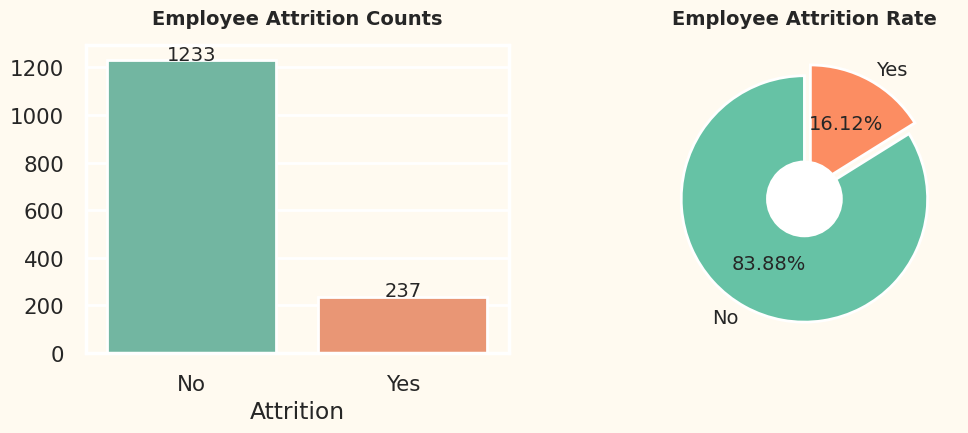

In [15]:
#Visualisation of employee attrition in numbers
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
attrition_rate = data["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='Set2')
plt.title("Employee Attrition Counts", fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v, ha='center', fontsize=14)
    
#Visualisation of employee attrition in %values
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)

In [16]:
def pie_bar_plot(data, col, hue):
    plt.figure(figsize=(14,6))
    
    # Extract value counts for the specified column
    value_counts = data[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_data = data[data[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_data[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

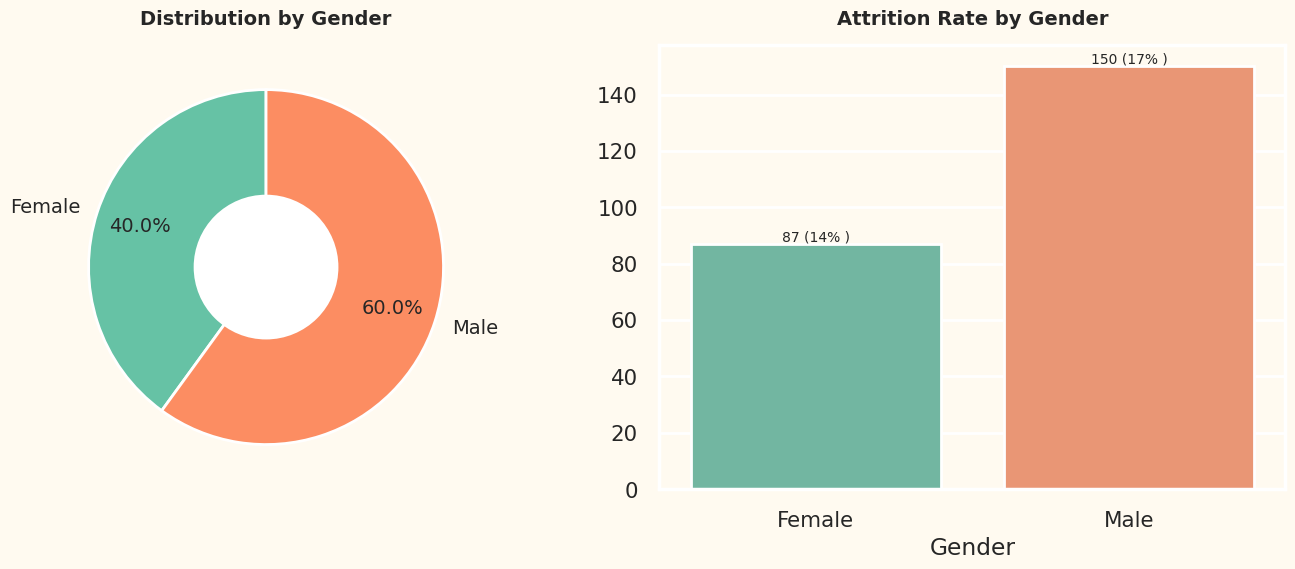

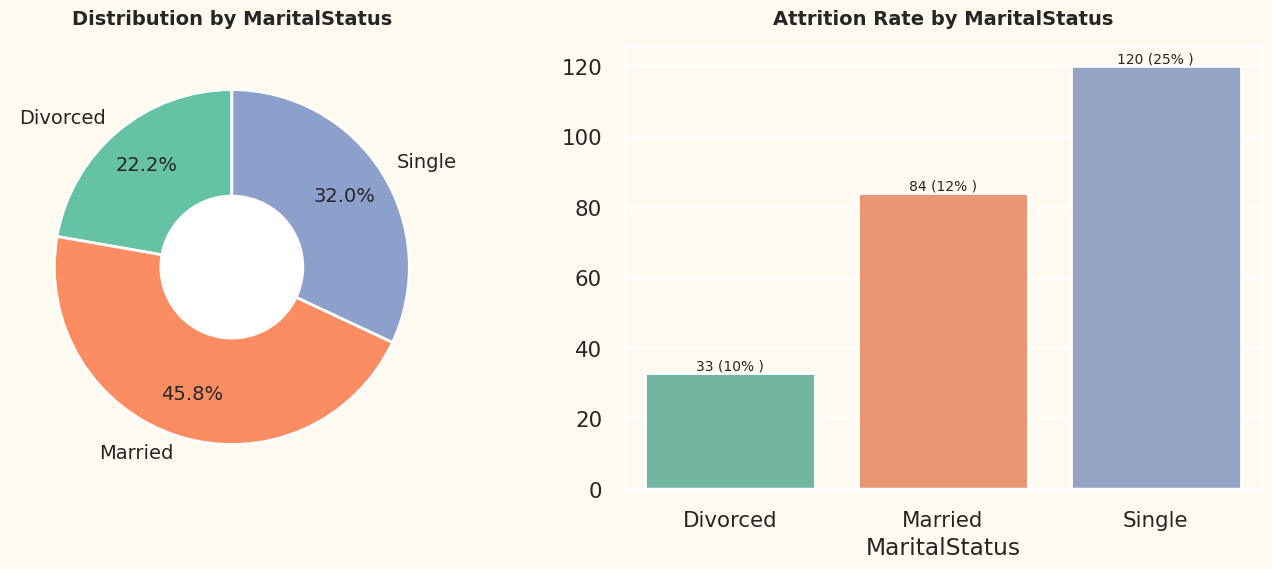

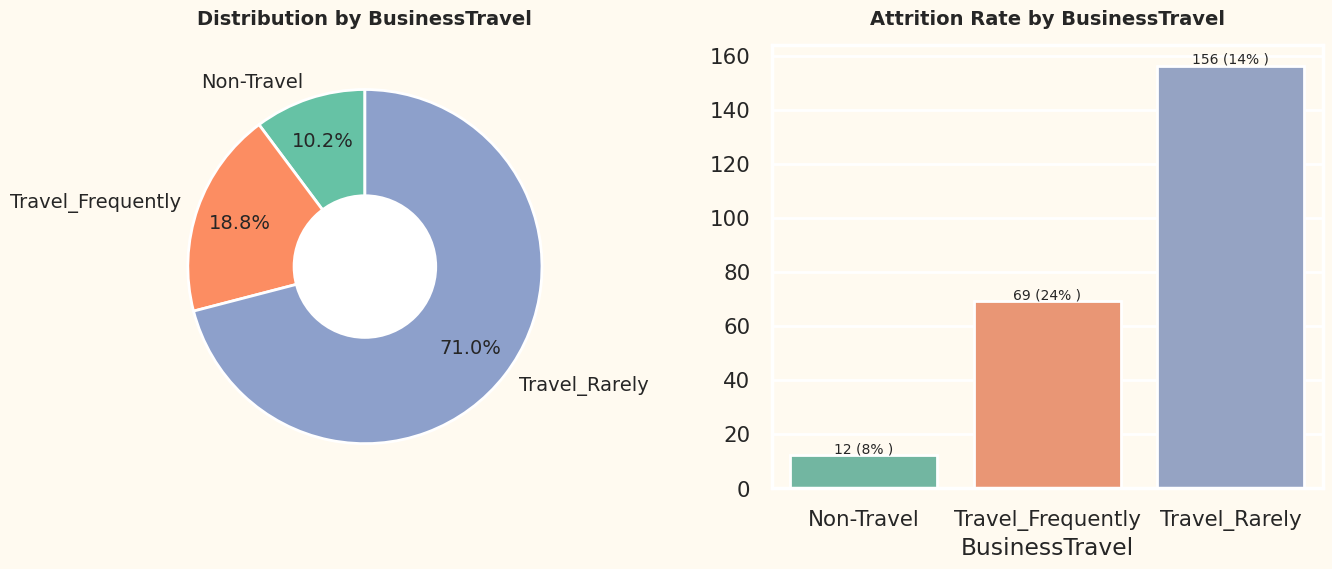

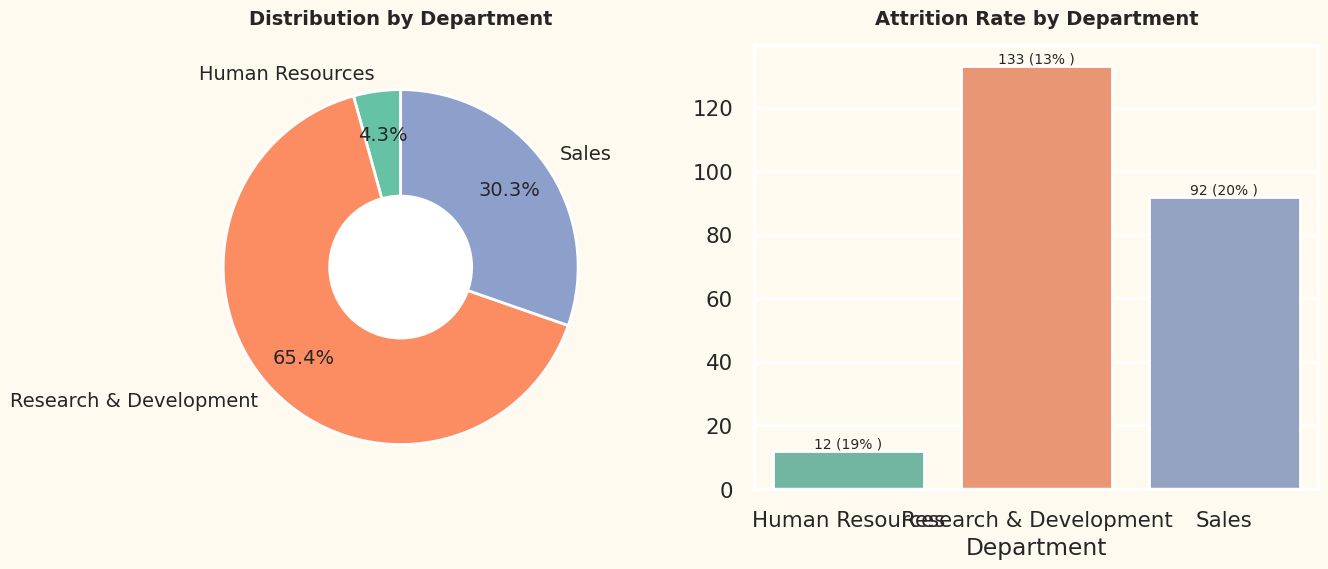

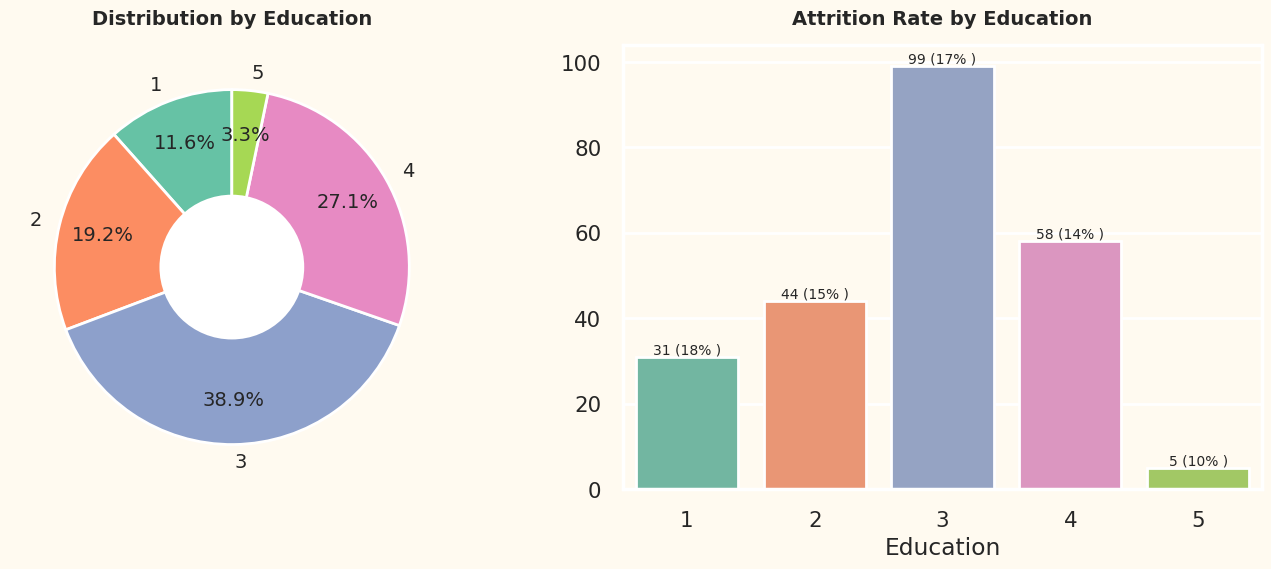

In [17]:
pie_bar_plot(data, 'Gender', 'Attrition')
print()
pie_bar_plot(data, 'MaritalStatus', 'Attrition')
print()
pie_bar_plot(data, 'BusinessTravel', 'Attrition')
print()
pie_bar_plot(data, 'Department', 'Attrition')
print()
pie_bar_plot(data, 'Education', 'Attrition')

In [18]:
def hist_with_hue(data, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=data, kde=True, palette='Set2')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=data, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

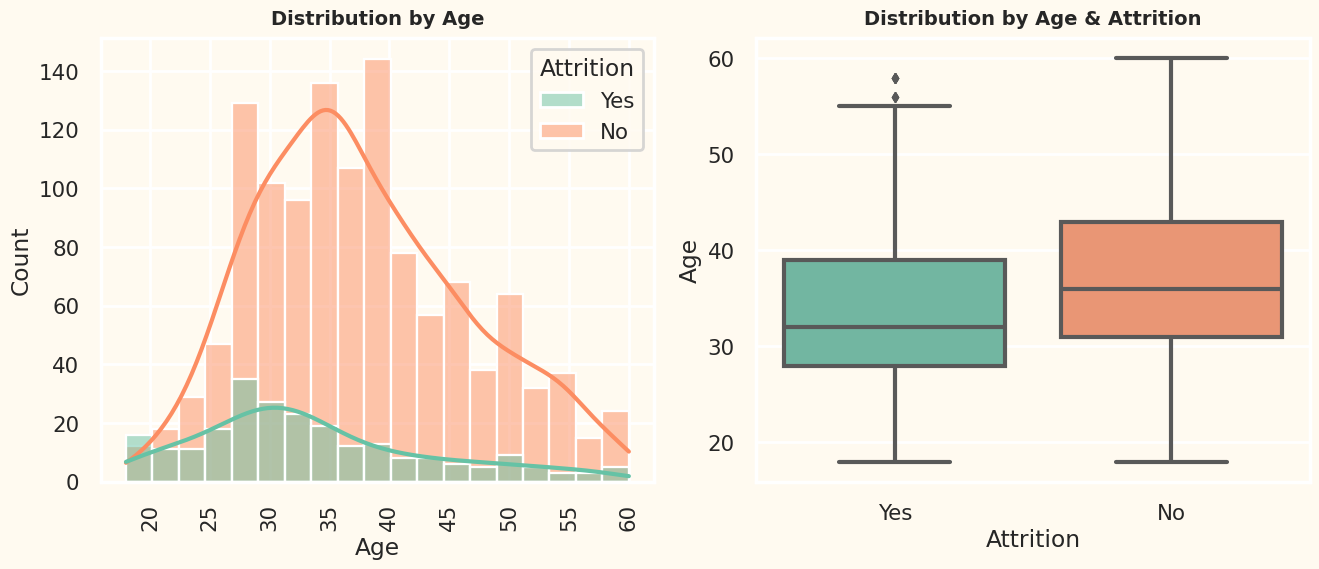

In [19]:
hist_with_hue(data, 'Age', 'Attrition')

In [20]:
def count_percent_plot(data, col, hue):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = data[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(data)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = data[data[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks( rotation=90)
    plt.tight_layout()
    plt.show()

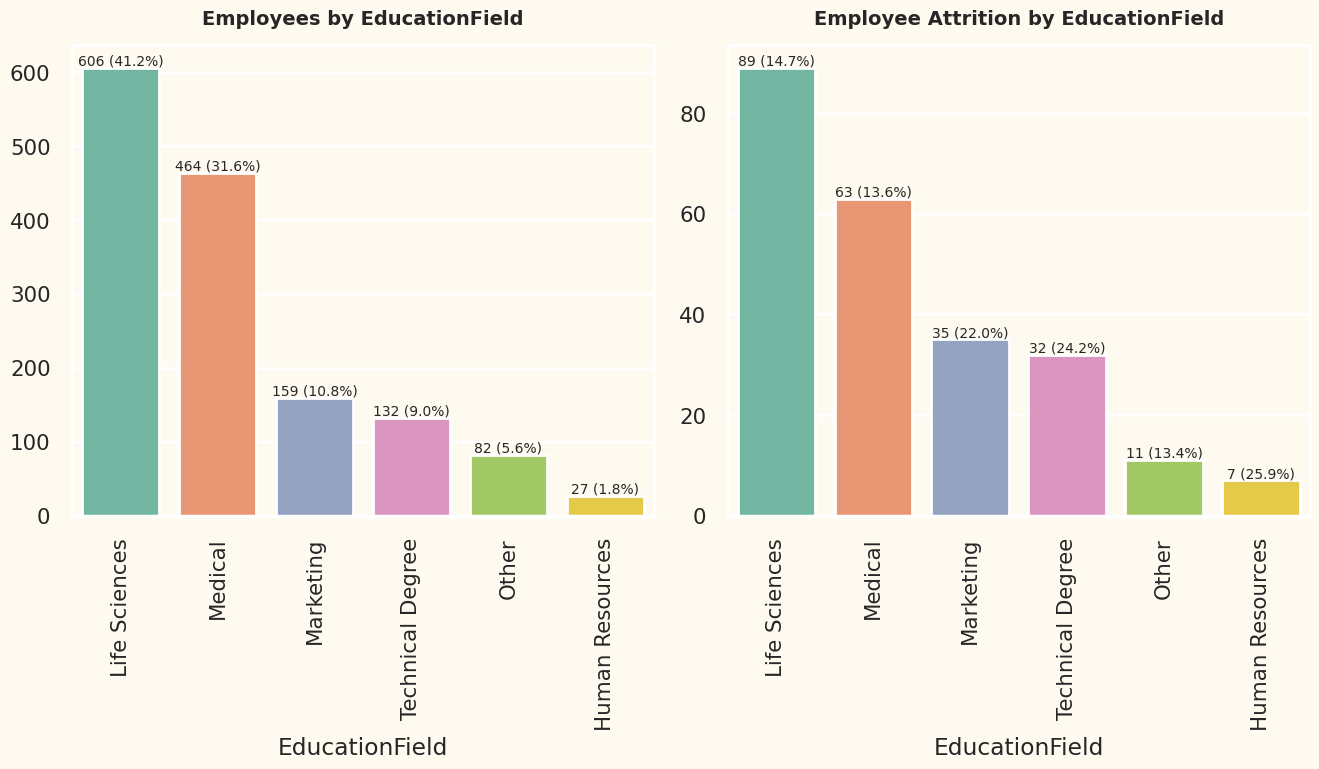

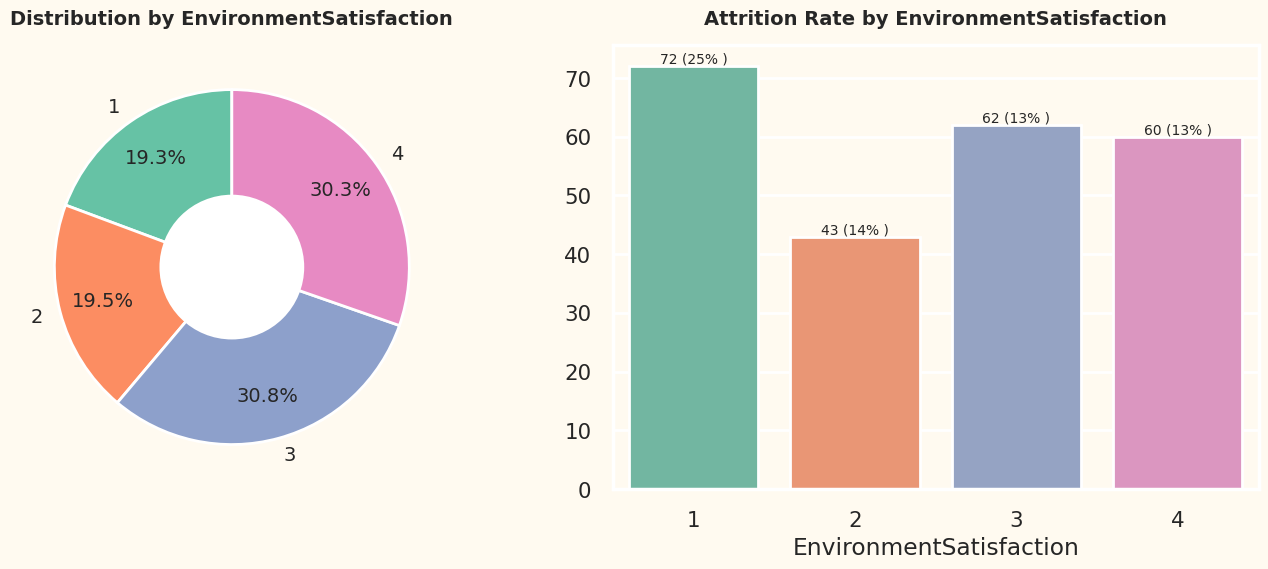

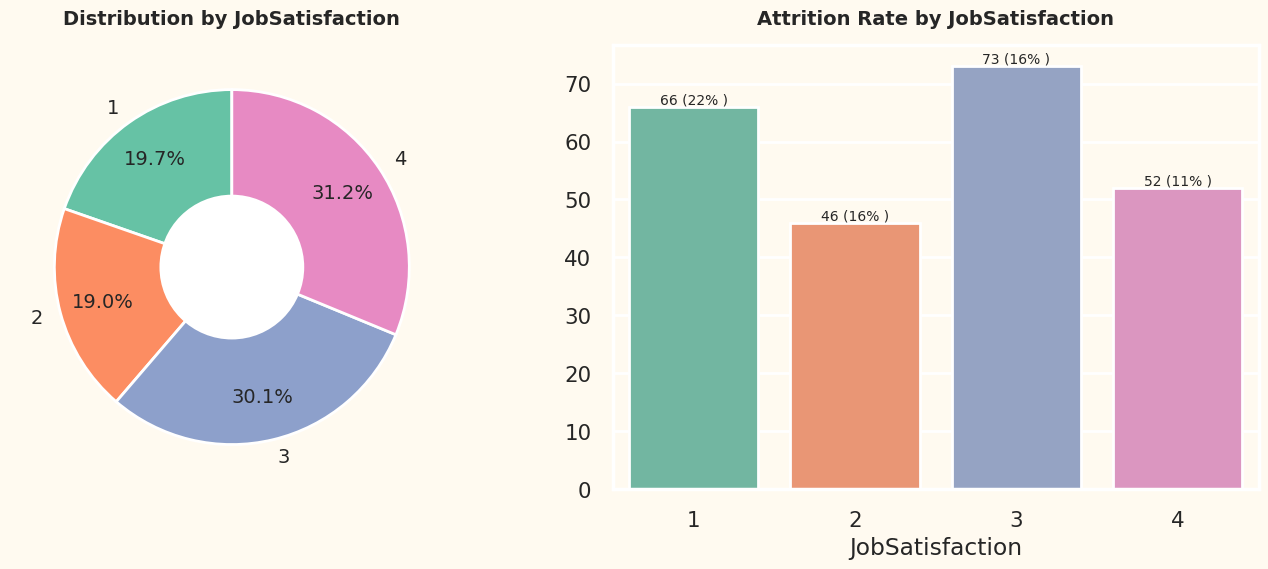

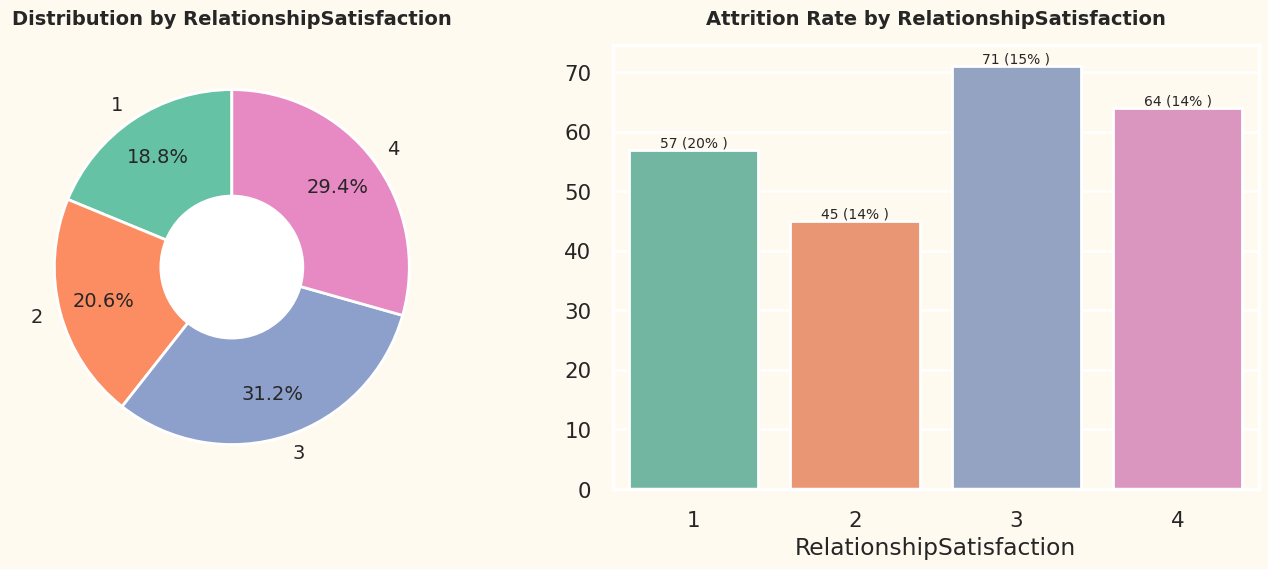

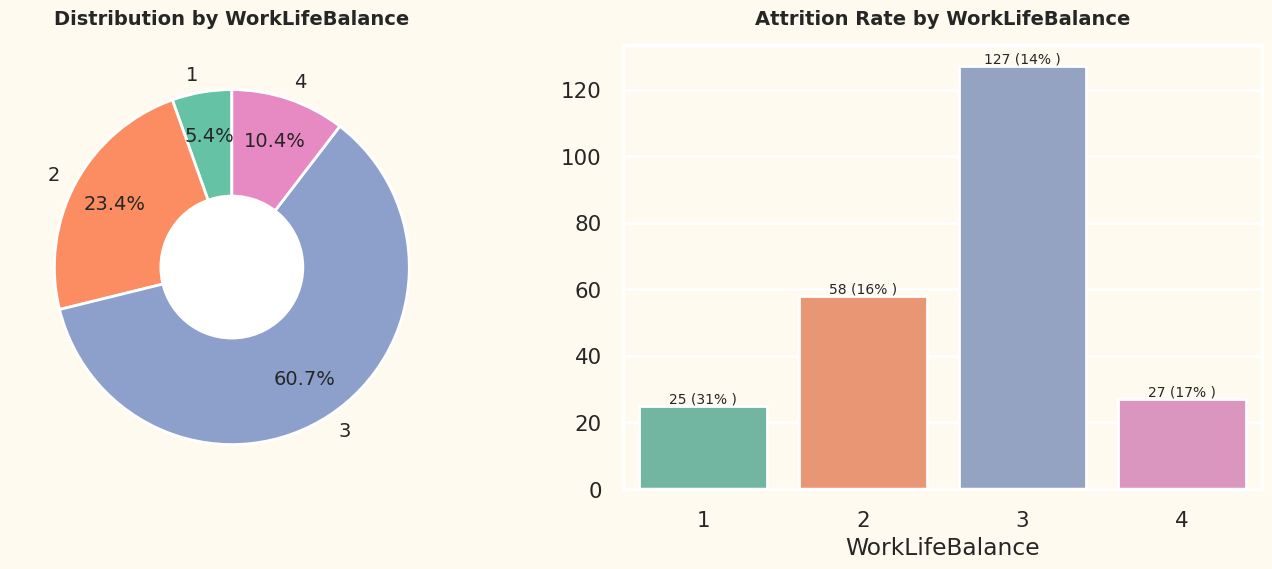

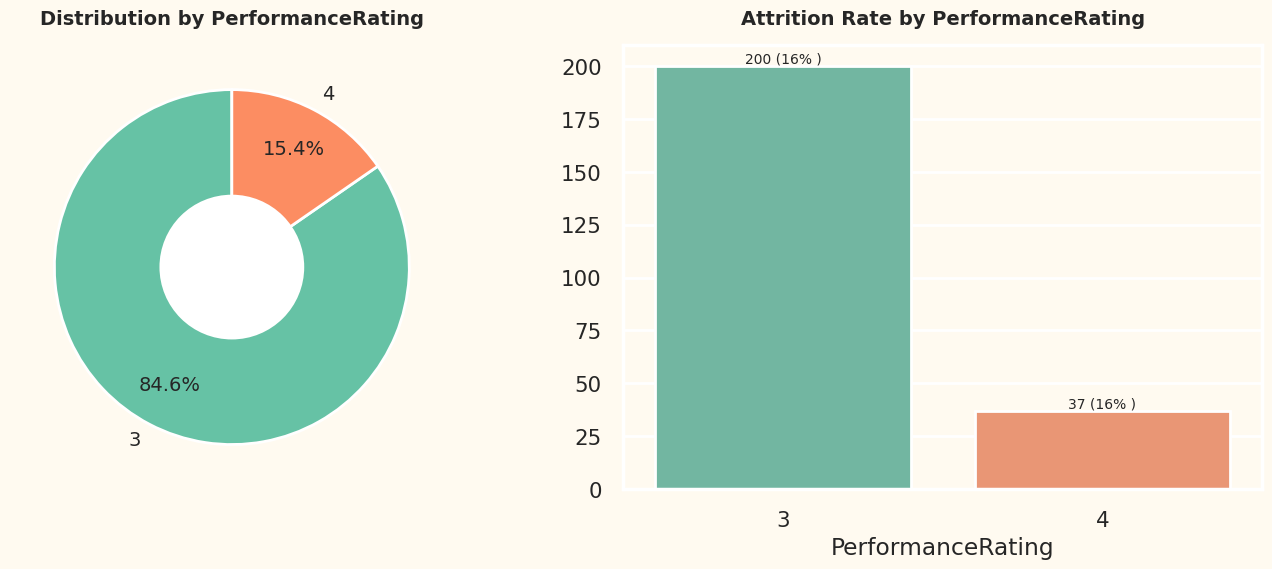

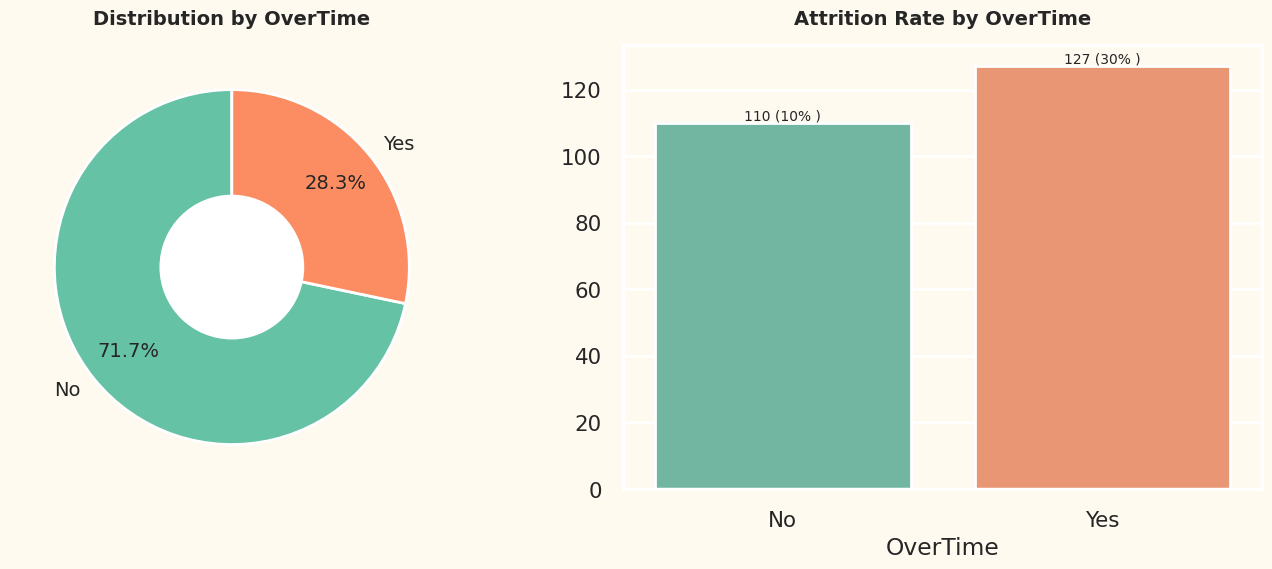

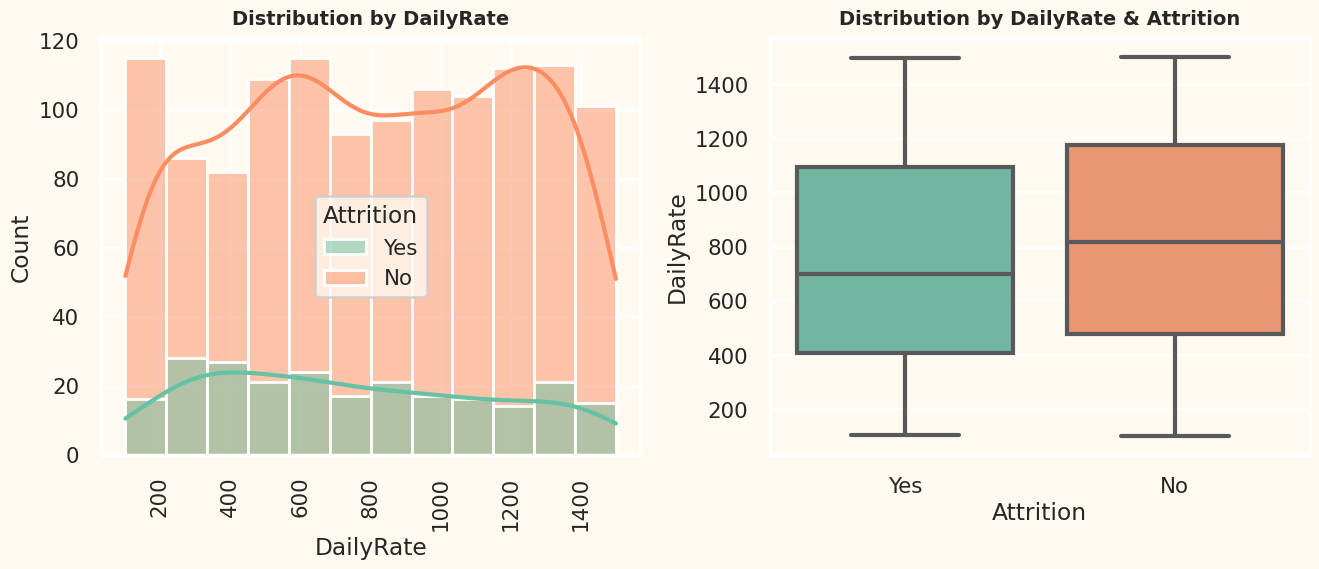

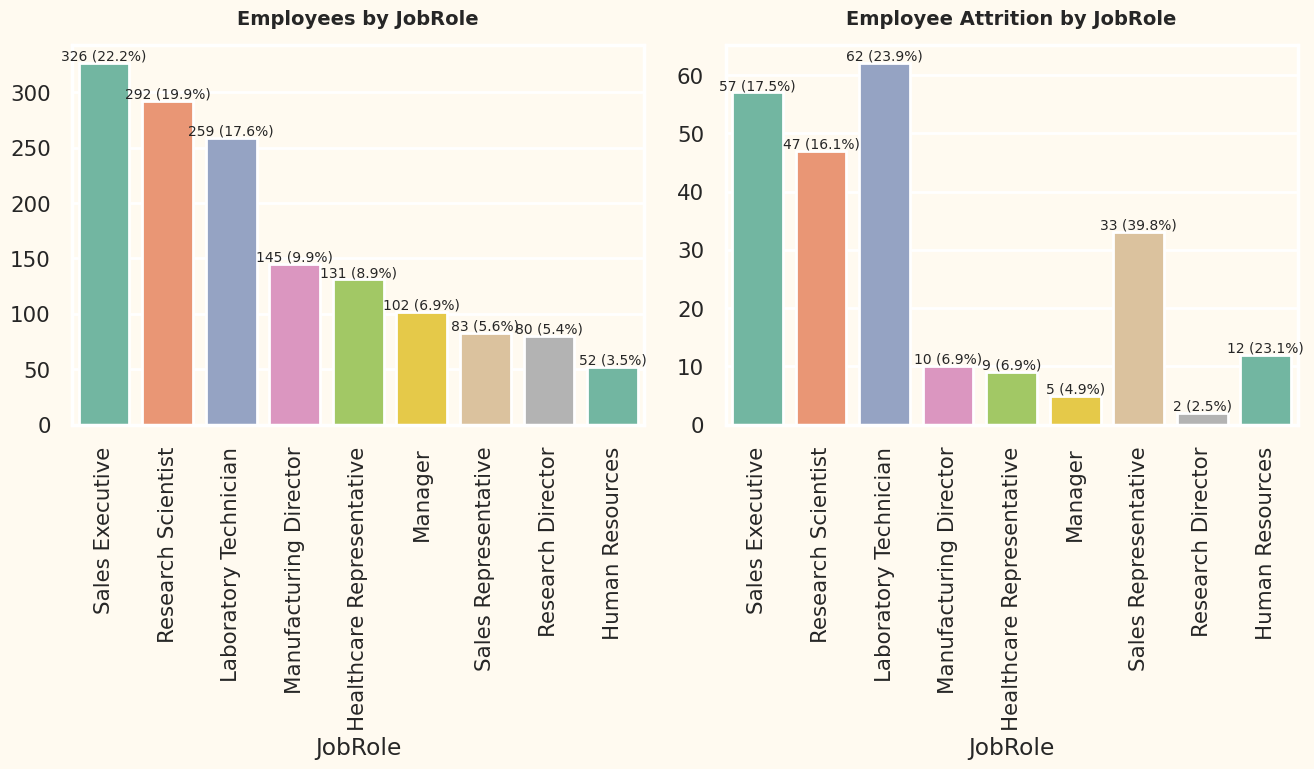

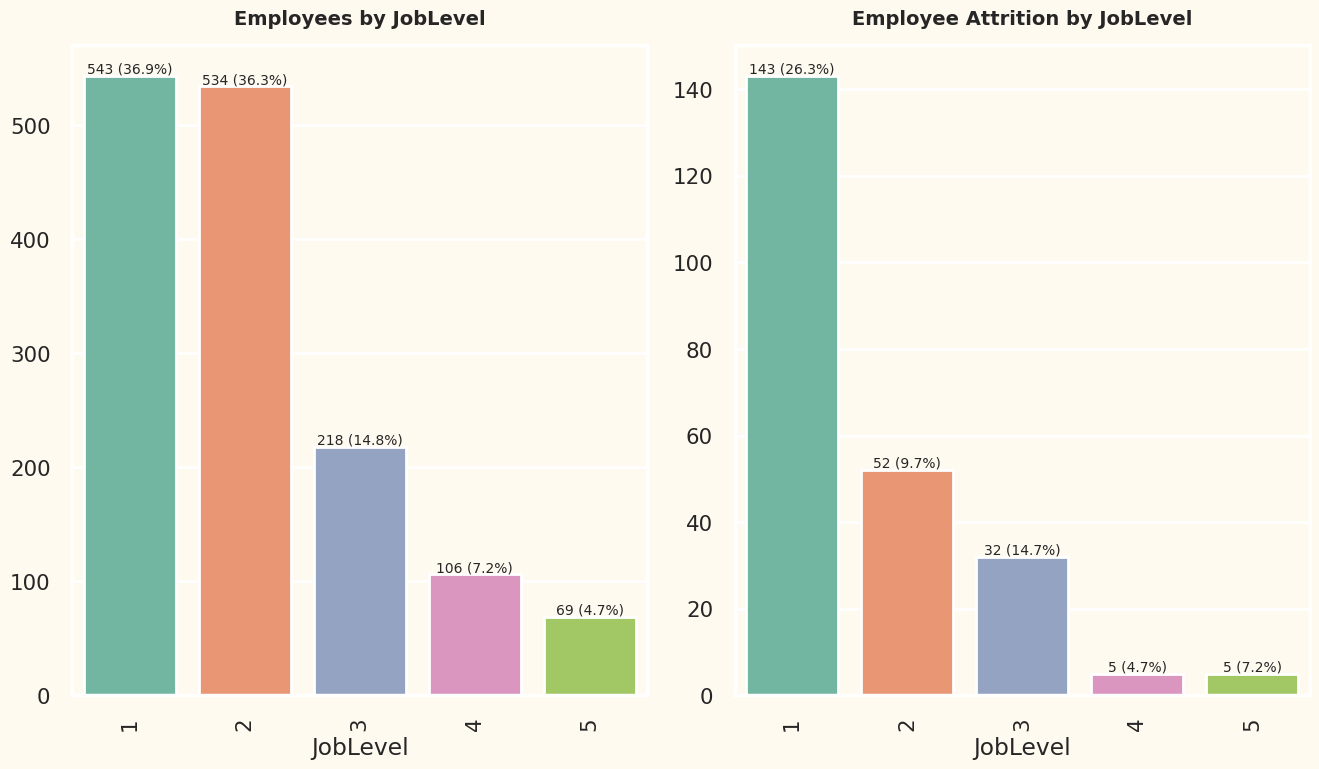

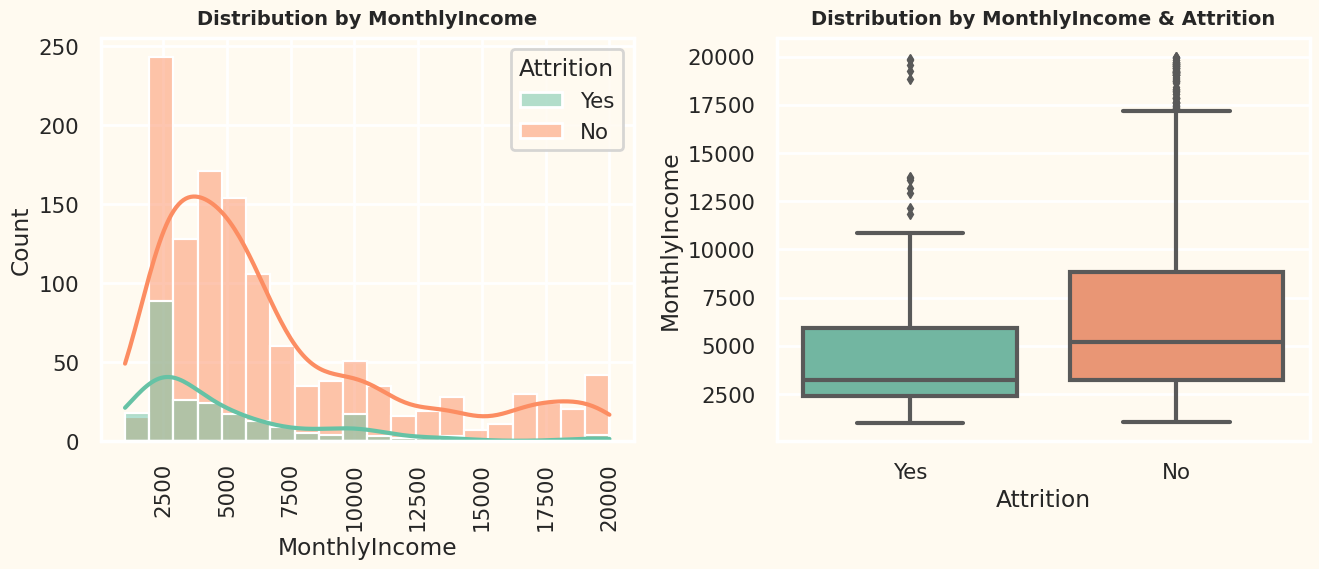

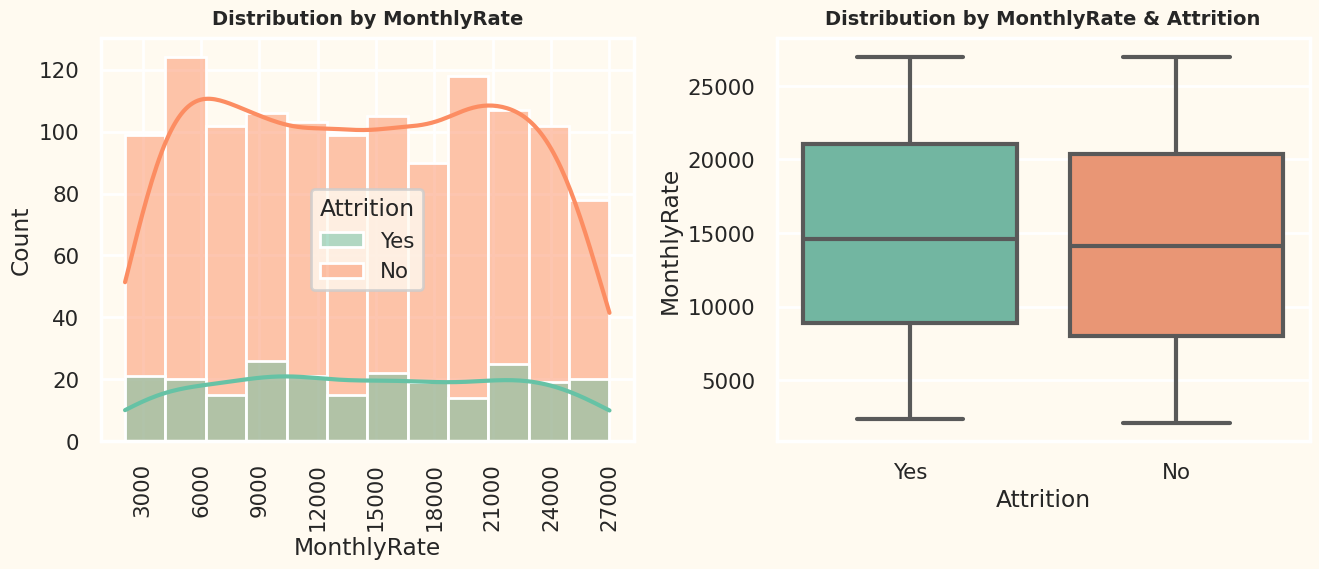

In [21]:
count_percent_plot(data, 'EducationField', 'Attrition')
pie_bar_plot(data, 'EnvironmentSatisfaction', 'Attrition')
pie_bar_plot(data, 'JobSatisfaction', 'Attrition')
pie_bar_plot(data, 'RelationshipSatisfaction', 'Attrition')
pie_bar_plot(data, 'WorkLifeBalance', 'Attrition')
pie_bar_plot(data, 'PerformanceRating', 'Attrition')
pie_bar_plot(data, 'OverTime', 'Attrition')
hist_with_hue(data, 'DailyRate', 'Attrition')
count_percent_plot(data, 'JobRole', 'Attrition')
count_percent_plot(data, 'JobLevel', 'Attrition')
hist_with_hue(data, 'MonthlyIncome', 'Attrition')
hist_with_hue(data, 'MonthlyRate', 'Attrition')


# Encoding

In [22]:
category_cols = data.select_dtypes(include='O').columns.tolist()
category_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [23]:
data["Gender"] = data["Gender"].replace({"Female" : 0, "Male" : 1})


Label encoding for other variables

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["Attrition"] = le.fit_transform(data["Attrition"])

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [26]:
encoded = encoder.fit_transform(data[['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']])

In [27]:
encoded_data = pd.DataFrame(encoded.toarray(), columns = encoder.get_feature_names_out())

In [28]:
data = pd.concat([data, encoded_data], axis=1)

In [29]:
data = data.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime'],axis =1)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

# For Correlation matrix

<Axes: title={'center': 'Correlation plot'}>

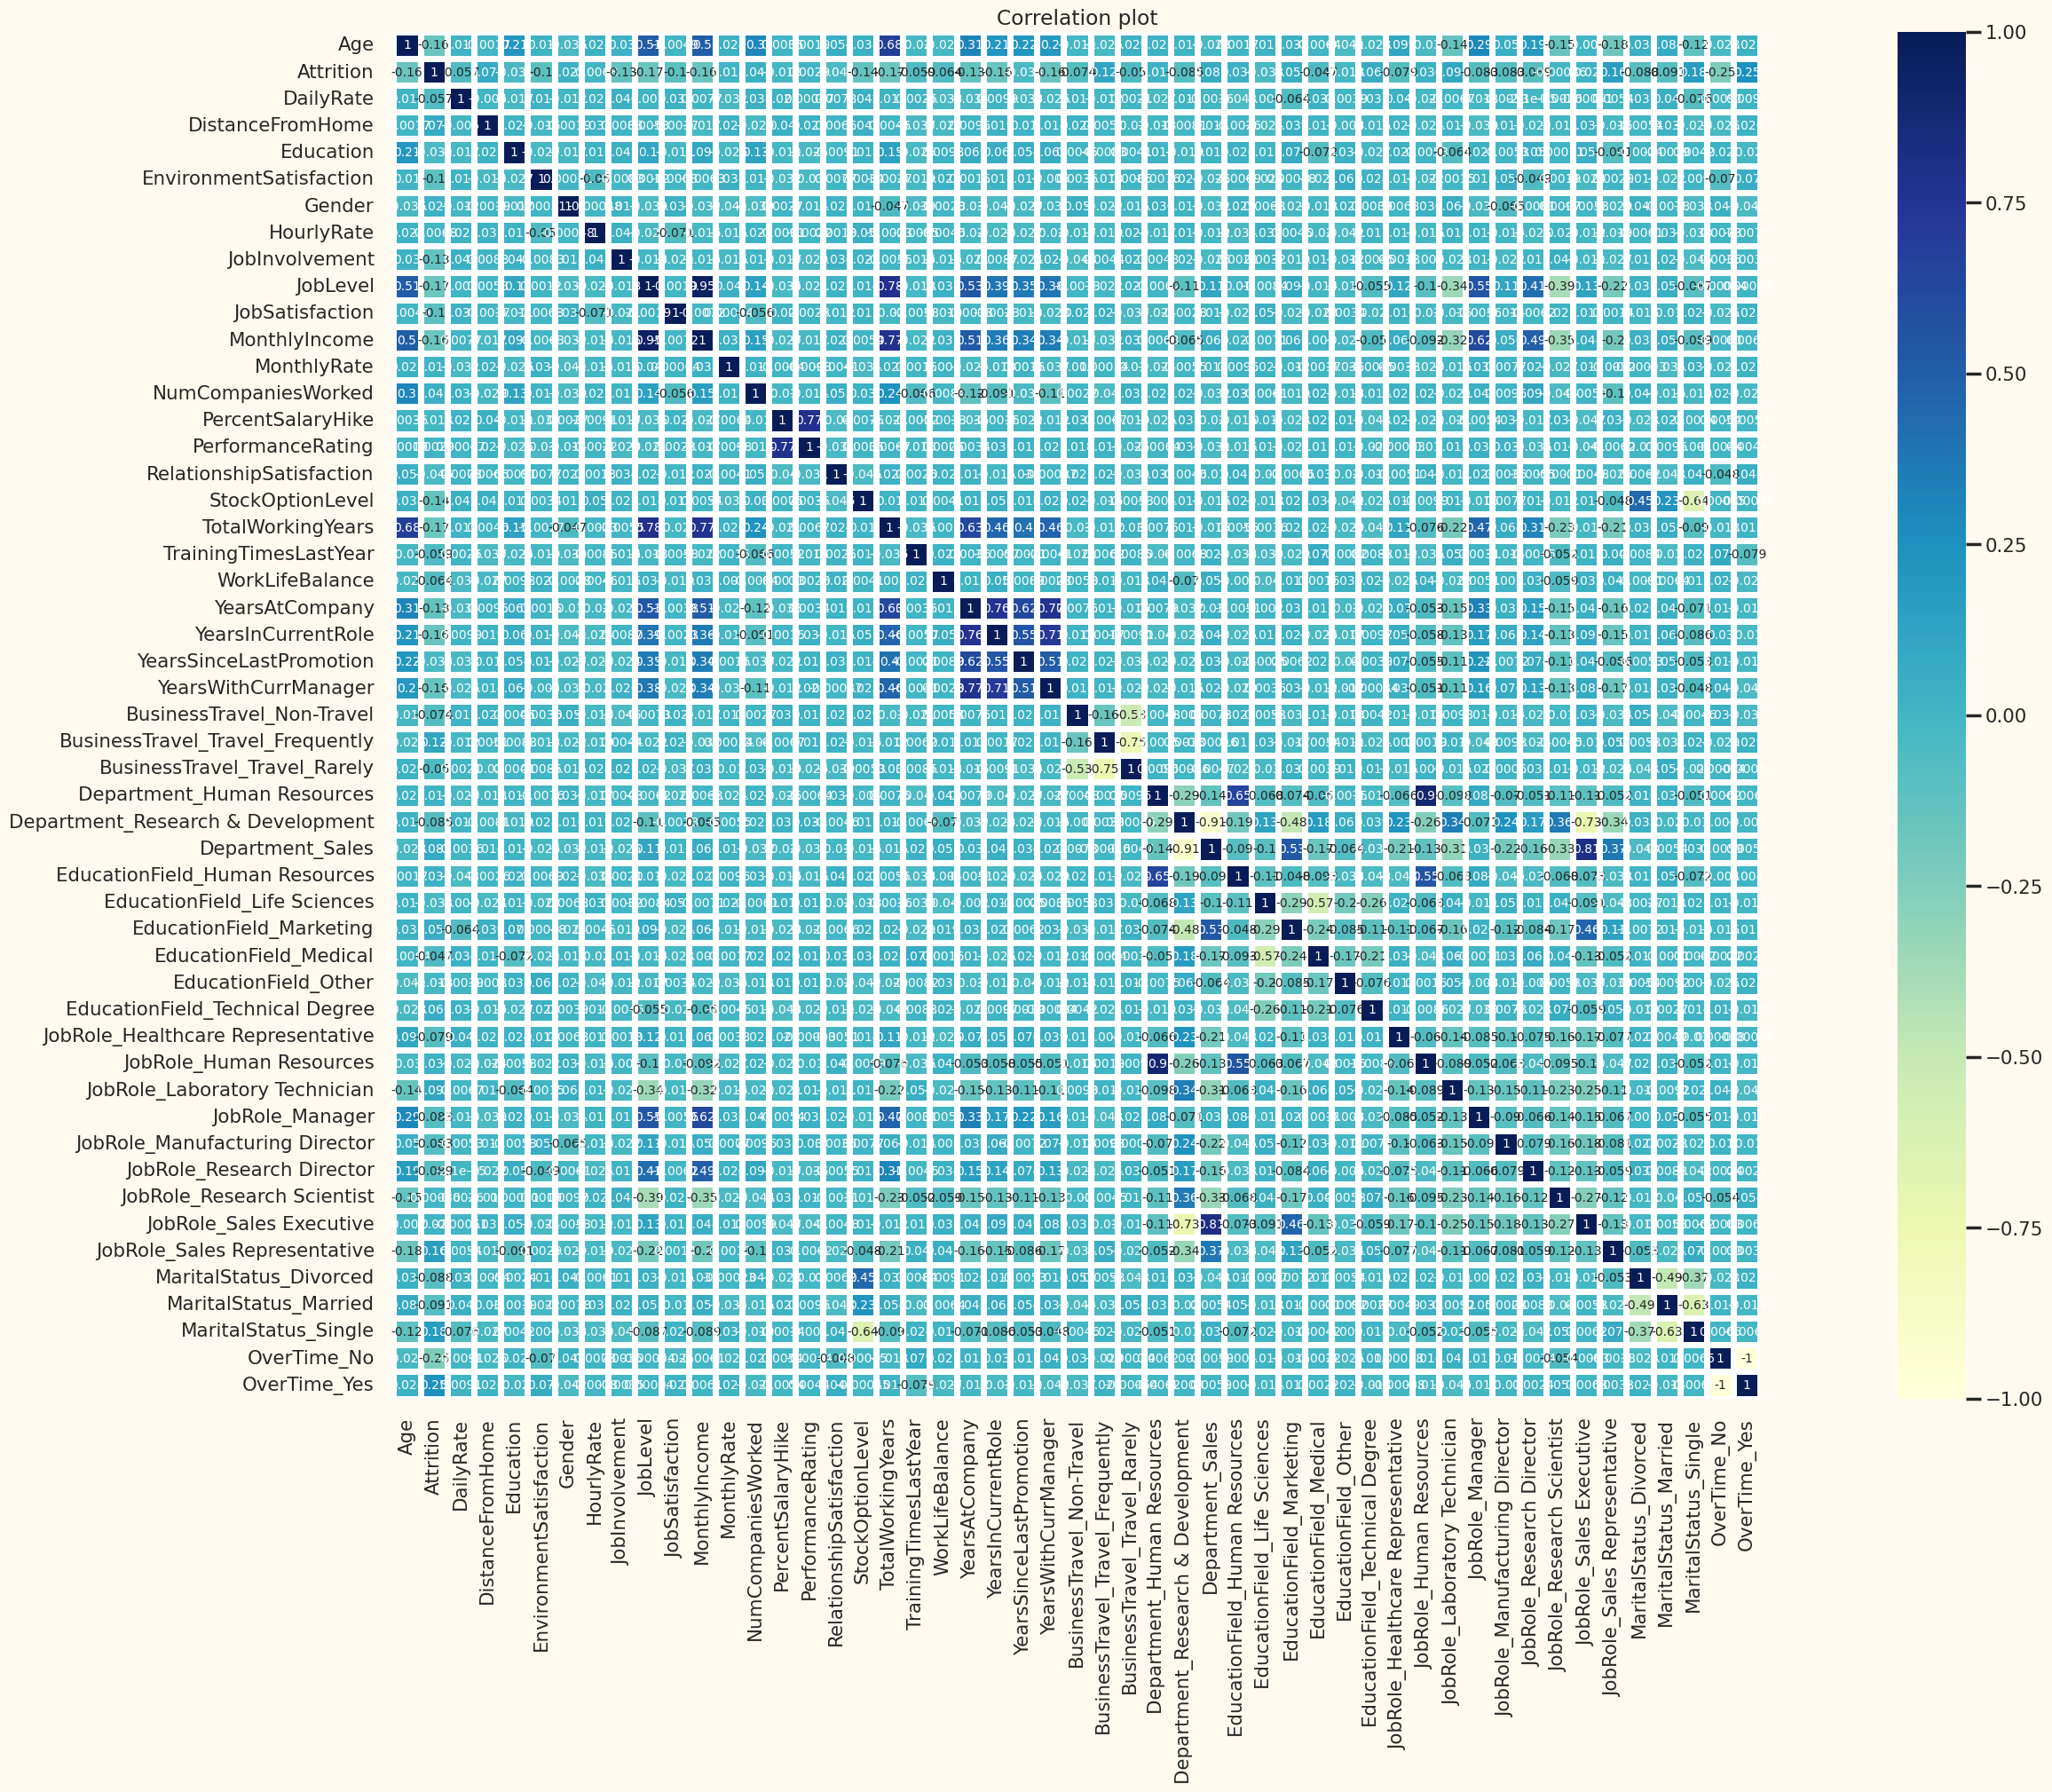

In [31]:
plt.figure(figsize=(40,20))
plt.title("Correlation plot")
sns.heatmap(data.corr(), linewidths=5, annot=True, square=True, annot_kws={'size':10}, cmap='YlGnBu')

In [32]:
correlation_matrix = data.corr()
high_corr_mask = correlation_matrix >= 0.75
highly_corr_features = []

for feature in high_corr_mask.columns:
    corr_with = high_corr_mask.index[high_corr_mask[feature]].tolist()
    for corr_feature in corr_with:
         if feature != corr_feature and (corr_feature, feature) not in highly_corr_features:
                highly_corr_features.append((feature, corr_feature))

print("Highly correlated features:")
for feature1, feature2 in highly_corr_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
JobLevel and MonthlyIncome
JobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
PercentSalaryHike and PerformanceRating
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager
Department_Human Resources and JobRole_Human Resources
Department_Sales and JobRole_Sales Executive


In [33]:
#Dropping columns that are highly correlated

cols = ['JobLevel', 'TotalWorkingYears', 'PercentSalaryHike', 'YearsInCurrentRole', 'YearsWithCurrManager']
data.drop(columns=cols, inplace=True)

In [34]:
x = data.drop(['Attrition'], axis=1)
y = data[['Attrition']]

In [35]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Before Smoote", y.value_counts())
print()
print("After Smoote", y.value_counts())

Before Smoote Attrition
0            1233
1             237
Name: count, dtype: int64

After Smoote Attrition
0            1233
1             237
Name: count, dtype: int64


# Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [37]:
x_scaled = scaler.fit_transform(x_smote)

# Splitting into training and Testing data
1. For Unscaled data
2. For scaled data

In [38]:
#UnScaled data splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

#Scaled data splitting
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

In [39]:
#Impotring ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

#for model evaluation
from sklearn.metrics import (accuracy_score,
                            recall_score,
                            precision_score,
                            f1_score,
                            confusion_matrix,
                            classification_report,
                            roc_auc_score,
                            cohen_kappa_score,
                            balanced_accuracy_score,
                            roc_curve)

2024-06-18 14:34:37.231778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 14:34:37.231966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 14:34:37.401596: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [40]:
#Collecting performance parametres from different models
training_score = []
testing_score = []
precision = []
recall = []
Roc_Auc_score = []
f1_score_ = []
kappa_score = []
G_Mean = []

# Model Building for Scaled Data

In [41]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = precision_score(y_test1,x_test_pred1)
    d = recall_score(y_test1,x_test_pred1)
    e = roc_auc_score(y_test1, y_test_prob1)
    #f = f1_score(y_test1,x_test_pred1)
    g = cohen_kappa_score(y_test1, x_test_pred1)
    h = balanced_accuracy_score(y_test1,x_test_pred1)
    training_score.append(a)
    testing_score.append(b)
    precision.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    #f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)
    
    
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"ROC_AUC Score of {model} model is:", e)
    #print(f"f1 Score of {model} model is:", f)
    print(f"kappa Score of {model} model is:", g)
    print(f"G_mean Score of {model} model is:", h)
 
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test1,x_test_pred1))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba1 = model.predict_proba(x_test1)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
    auc = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()


------------------------------------------------------------------------
Accuracy_Score of LogisticRegression() model on Training Data is: 85.49695740365112
Accuracy_Score of LogisticRegression() model on Testing Data is: 85.02024291497976
Precision Score of LogisticRegression() model is: 0.84
Recall Score of LogisticRegression() model is: 0.860655737704918
ROC_AUC Score of LogisticRegression() model is: 0.9265737704918033
kappa Score of LogisticRegression() model is: 0.7004490478219542
G_mean Score of LogisticRegression() model is: 0.8503278688524589

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       250
           1       0.84      0.86      0.85       244

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      

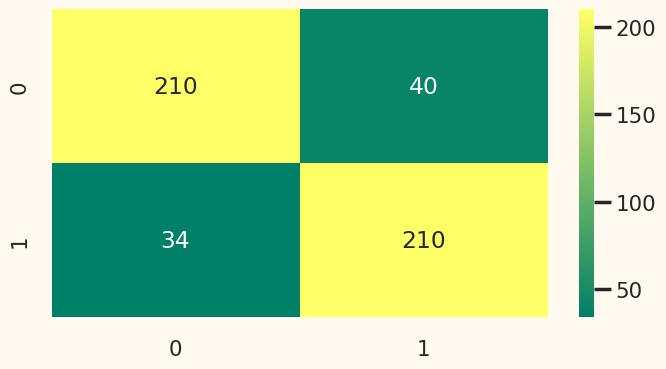


------------------------------------------------------------------------
ROC - AUC Curve of LogisticRegression() model is:


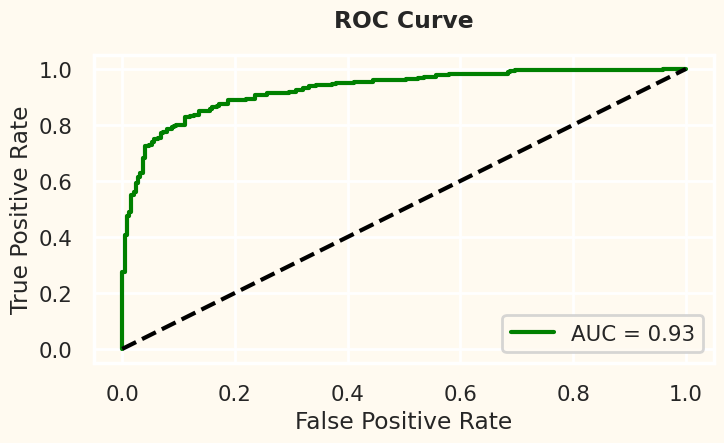




------------------------------------------------------------------------
Accuracy_Score of KNeighborsClassifier() model on Training Data is: 91.22718052738337
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 87.65182186234817
Precision Score of KNeighborsClassifier() model is: 0.8060200668896321
Recall Score of KNeighborsClassifier() model is: 0.9877049180327869
ROC_AUC Score of KNeighborsClassifier() model is: 0.9663524590163934
kappa Score of KNeighborsClassifier() model is: 0.7536663124335813
G_mean Score of KNeighborsClassifier() model is: 0.8778524590163934

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       250
           1       0.81      0.99      0.89       244

    accuracy                           0.88       494
   macro avg       0.90      0.88      0.88       494
weight

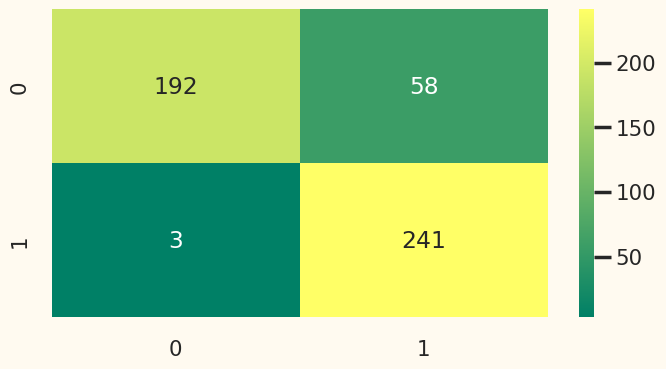


------------------------------------------------------------------------
ROC - AUC Curve of KNeighborsClassifier() model is:


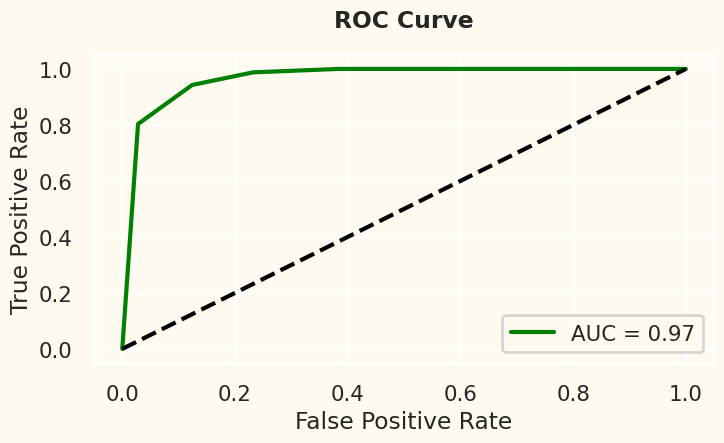




------------------------------------------------------------------------
Accuracy_Score of GaussianNB() model on Training Data is: 76.21703853955376
Accuracy_Score of GaussianNB() model on Testing Data is: 77.32793522267207
Precision Score of GaussianNB() model is: 0.7185430463576159
Recall Score of GaussianNB() model is: 0.889344262295082
ROC_AUC Score of GaussianNB() model is: 0.8849508196721312
kappa Score of GaussianNB() model is: 0.5477817373393925
G_mean Score of GaussianNB() model is: 0.7746721311475411

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       250
           1       0.72      0.89      0.79       244

    accuracy                           0.77       494
   macro avg       0.79      0.77      0.77       494
weighted avg       0.79      0.77      0.77       494


-------------------------------

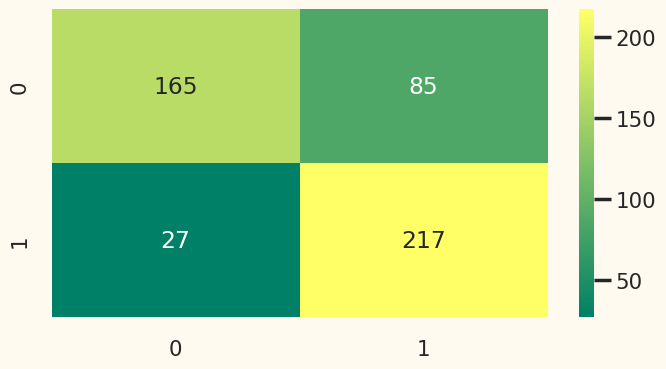


------------------------------------------------------------------------
ROC - AUC Curve of GaussianNB() model is:


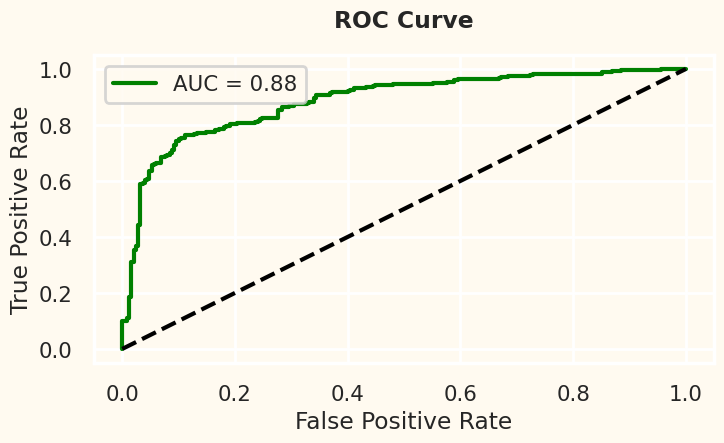

In [42]:
#Logistic Regression Model
model_prediction(LogisticRegression())
print()
print()
#K-Nearest Neighbor(KNN)
model_prediction(KNeighborsClassifier())
print()
print()
#Naive Bayes
model_prediction(GaussianNB())

# Model Building for Unscaled data

In [43]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    #f = f1_score(y_test,x_test_pred)
    g = cohen_kappa_score(y_test, x_test_pred)
    h = balanced_accuracy_score(y_test,x_test_pred)
    training_score.append(a)
    testing_score.append(b)
    precision.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    #f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)
    
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, model.predict(x_test)))
    
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba = model.predict_proba(x_test)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()


------------------------------------------------------------------------
Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 87.4493927125506
Precision Score of DecisionTreeClassifier() model is: 0.8791666666666667
Recall Score of DecisionTreeClassifier() model is: 0.8647540983606558
AUC Score of DecisionTreeClassifier() model is: 0.8743770491803278

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       250
           1       0.88      0.86      0.87       244

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494


------------------------------------------------------------------------
Confusion Matrix of

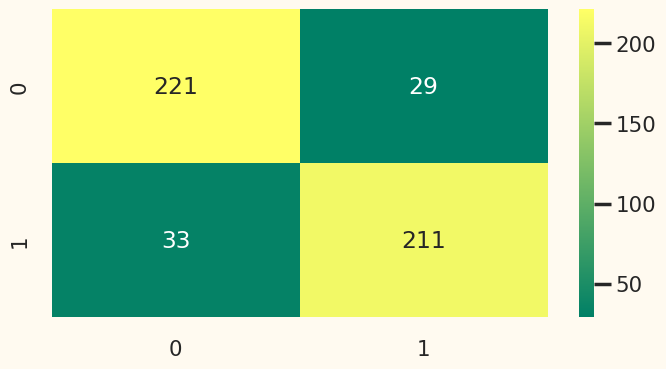


------------------------------------------------------------------------
ROC - AUC Curve of DecisionTreeClassifier() model is:


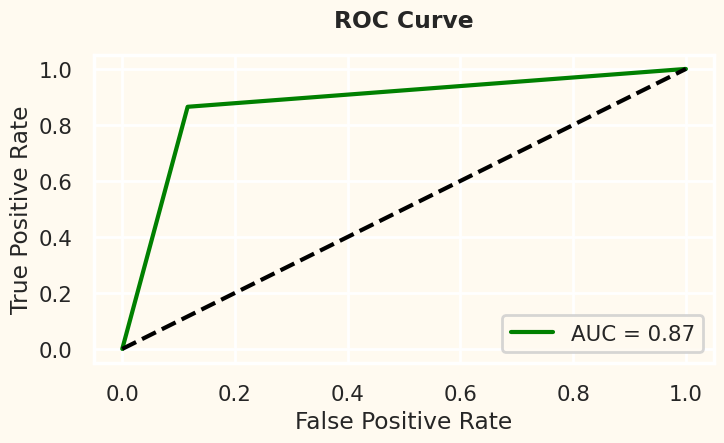


------------------------------------------------------------------------
Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 92.71255060728745
Precision Score of RandomForestClassifier() model is: 0.9684684684684685
Recall Score of RandomForestClassifier() model is: 0.8811475409836066
AUC Score of RandomForestClassifier() model is: 0.9718934426229509

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       250
           1       0.97      0.88      0.92       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


------------------------------------------------------------------------
Confusion Matrix o

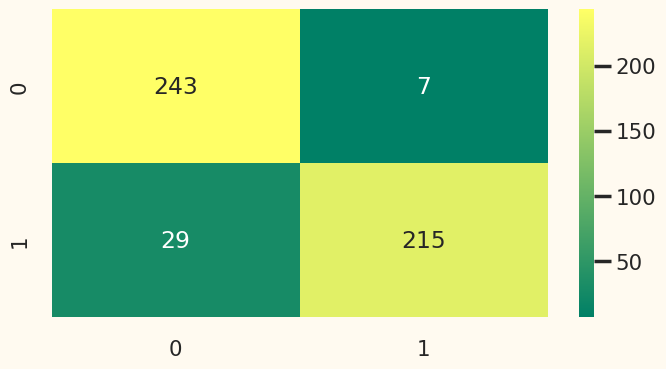


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier() model is:


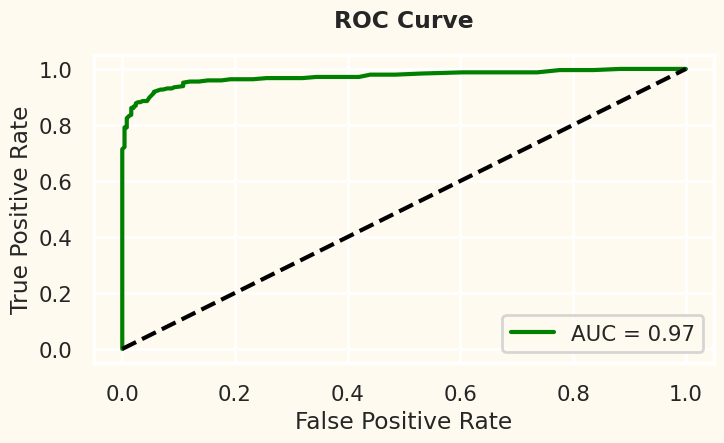


------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, 

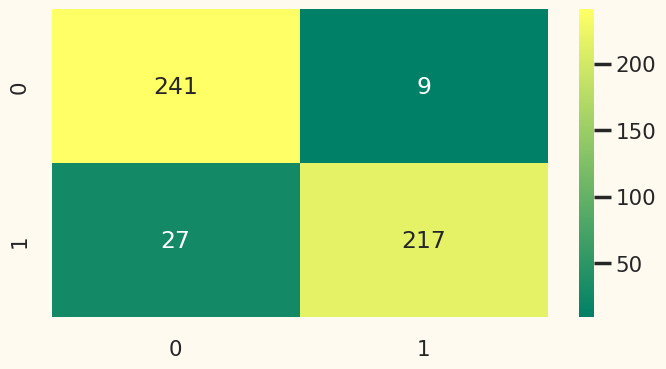


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model is:


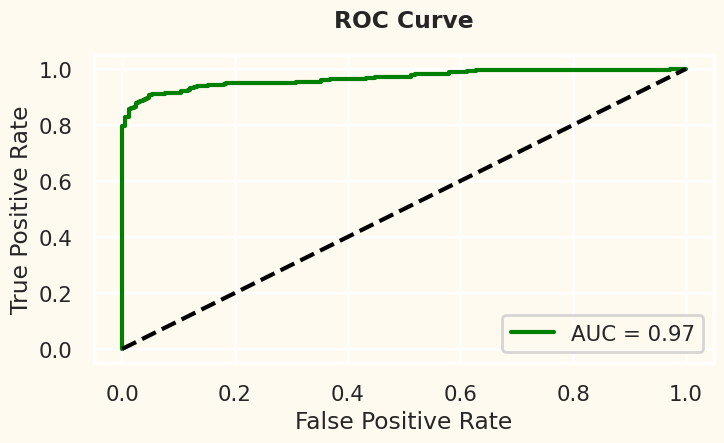

In [44]:
#Decision tree
model_prediction(DecisionTreeClassifier())
#Random Forest
model_prediction(RandomForestClassifier())
#XG Boost
model_prediction(XGBClassifier())